In [1]:
using SNNT

In [2]:
include("Analysis.jl")

plot_trajectory2 (generic function with 1 method)

In [3]:
using Plots

In [157]:
#l = @layout [a b; c d; e f]
l = @layout [grid(3,2)
    b{0.05h}]

2×1 Matrix{Any}:
 Plots.GridLayout(3, 2)
 (label = :b, width = :auto, height = 0.05)

In [29]:
function plot_trajectory_gathered(plot_name,crash_trace,cf_trace;tau=0.1,rv=2200,altitute_offset = 10000,xlims=(-6.7,6.7),ylims=(9400,10500),figsize=(600,300),delta=2.0,imgmodifier=1.0,show_planes=false,show_traces=true,xtitle=true,ytitle=true)
    # CC 0 image: https://www.rawpixel.com/image/6481821/vector-sticker-public-domain-blue
    intruder = load("intruder.png")  
    time_total = length(crash_trace)*tau
    time_to_nmac = time_total-5+500/rv
    t_ownship = -time_to_nmac:tau:(time_total-time_to_nmac)
    t_ownship = t_ownship[1:length(crash_trace)]
    t_intruder = time_to_nmac:-tau:(time_to_nmac-time_total)
    t_intruder = t_intruder[1:length(crash_trace)]
    pos_intruder = altitute_offset+crash_trace[1][1]
    h_intruder = repeat([pos_intruder],length(t_intruder))
    h_crash = [(pos_intruder-x[1]) for x in crash_trace]
    h_cf = [(pos_intruder-x[1]) for x in cf_trace]
    plot(nmac_rectangle(altitute_offset=pos_intruder),label="NMAC collision region          ",color="#ff6f91")
    if xtitle
        plot!(xlabel="time for intruder / -time for ownship (s)")
    end
    if ytitle
        plot!(ylabel="altitude (ft)")
    end
    if show_traces
        plot!(t_ownship, h_crash,
            labels="Ownship (current advisory)",
            linestyle=:solid,
            xlims=xlims, ylims=ylims,
            size=figsize,
            leftmargin = 30Plots.px,
            bottommargin = 40Plots.px,
            color="#2c73d2", linewidth=3,
            tickfontsize=16,
            guidefontsize=16,
            legend=false)#,
            #aspect_ratio=3e-3)
        plot!(t_ownship, h_cf, labels="Original path of ownship",linestyle=:dash,color="#ffc75f", linewidth=3)
        plot!(t_intruder,h_intruder, label="Intruder",color="#d65db1",linestyle=:dot, linewidth=3)
    else
        # "Ownship (current advisory)"
        # "NMAC collision region     "
        plot!(nmac_rectangle(altitute_offset=pos_intruder),label="NMAC collision region          ",color="#ff6f91",
        xlims=xlims, ylims=ylims,
        xlabel="time for intruder / -time for ownship (s)",
        ylabel="altitude (ft)",
        size=figsize,
        leftmargin = 30Plots.px,
        bottommargin = 40Plots.px,
        tickfontsize=16,
        guidefontsize=16,
        legend=false)
    end

    # Images
    if show_planes
        y_modifier = (ylims[2]-ylims[1])/max(xlims[2],-xlims[1])
        # Ownship
        # Compute angle
        dt = delta#tau
        dh = (h_crash[convert(Int,delta/tau)][1]-h_crash[1][1])/y_modifier
        println(dh*180/pi)
        println(dt)
        println(dh)
        theta = atan(dh/dt)
        ownship = imrotate(reverse(intruder,dims=(1,2)),theta)
        x1 = -time_to_nmac
        x2 = -time_to_nmac+delta*(size(ownship,2)/size(intruder,2))
        ownship_ratio = size(ownship,1)/size(ownship,2)
        x_center = (x1+x2)/2
        # Find index of h_cf closest to x_center
        idx = argmin(abs.(t_ownship .- x_center))
        y_center = h_cf[idx]
        y_range = (x2-x1)*ownship_ratio*y_modifier*imgmodifier
        # if theta > 0
        #     y1 = h_crash[1]-y_range*(1/8)
        #     y2 = h_crash[1]+y_range*(7/8)
        # else
        #     y1 = h_crash[1]-y_range*(7/8)
        #     y2 = h_crash[1]+y_range*(1/8)
        # end
        y1 = y_center-y_range*0.5
        y2 = y_center+y_range*0.5
        plot!([x1,x2],[y1,y2],ownship,fopacity=1.0,aspect_ratio=:none,yflip=false)
        # Intruder
        x1 = time_to_nmac-delta
        x2 = time_to_nmac
        intruder_ratio = size(intruder,1)/size(intruder,2)
        y_range = (x2-x1)*intruder_ratio*y_modifier*imgmodifier
        y1 = pos_intruder-y_range*(4/8)
        y2 = pos_intruder+y_range*(4/8)
        plot!([x1,x2],[y1,y2],reverse(intruder,dims=1),fopacity=1.0,aspect_ratio=:none,yflip=false)
    end
    #xlims=xlims, ylims=ylims,size=figsize)
    #plot!([-7.0,7.0],[9400,11000])
    return plot!()
end

plot_trajectory_gathered (generic function with 1 method)

# Vertical CAS Advisories

**Assumptions:**
- Ignore any COC
- Level flight of intruder (constant)

### Previous Advisory: DNC

In [6]:
folder = "./vertcas-pra02"
prefix = "vertcas-full-compressed-pra02"

"vertcas-full-compressed-pra02"

In [7]:
result_summary, metadata = summarize_and_load(folder,prefix)

Loading results from ./vertcas-pra02/vertcas-full-compressed-pra02-*.jld


(SNNT.VerifierInterface.OlnnvResult(SNNT.VerifierInterface.Safe, Any[SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(10, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(10, 0), SNNT.SMTInterface.SmtFilterMeta(13, 0), SNNT.SMTInterface.SmtFilterMeta(10, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(12, 0)  …  SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0)], SNNT.VerifierInterface.Star[]), Dict{String, Any}("approx" => 1, "no-cores" => false, "linear" => false, "output" => "experiments/acas/vertcas

In [8]:
println("Status:")
println(result_summary.status)
println("Enumerated Stars:")
println(sum(x->x.original_meta,result_summary.metadata))
println("Filtered Stars:")
println(sum(x->x.filtered_out,result_summary.metadata))

Status:
Safe
Enumerated Stars:
20505
Filtered Stars:
139


### Previous Advisory: DND

In [9]:
folder = "./vertcas-pra03"
prefix = "vertcas-full-compressed-pra03"

"vertcas-full-compressed-pra03"

In [10]:
result_summary, metadata = summarize_and_load(folder,prefix)

Loading results from ./vertcas-pra03/vertcas-full-compressed-pra03-*.jld


(SNNT.VerifierInterface.OlnnvResult(SNNT.VerifierInterface.Safe, Any[SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(0, 0)  …  SNNT.SMTInterface.SmtFilterMeta(18, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0)], SNNT.VerifierInterface.Star[]), Dict{String, Any}("approx" => 1, "no-cores" => false, "linear" => false, "output" => "experiments/acas/vertcas-pra

In [11]:
println("Status:")
println(result_summary.status)
println("Enumerated Stars:")
println(sum(x->x.original_meta,result_summary.metadata))
println("Filtered Stars:")
println(sum(x->x.filtered_out,result_summary.metadata))

Status:
Safe
Enumerated Stars:
17816
Filtered Stars:
0


### Previous Advisory: DES1500

In [12]:
folder = "./vertcas-pra04"
prefix = "vertcas-full-compressed-pra04"

"vertcas-full-compressed-pra04"

In [13]:
result_summary, metadata = summarize_and_load(folder,prefix)

Loading results from ./vertcas-pra04/vertcas-full-compressed-pra04-*.jld


(SNNT.VerifierInterface.OlnnvResult(SNNT.VerifierInterface.Unknown, Any[SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(1, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(1, 0), SNNT.SMTInterface.SmtFilterMeta(1, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0)  …  SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(11, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0)], SNNT.VerifierInterface.Star[SNNT.VerifierInterface.Star(Float32[0.0 0.52781475 0.0 -0.8493596; 0.0 0.52781475 0.0 -0.8493596; … ; 0.31979656 -0

In [14]:
println("Status:")
println(result_summary.status)
println("Enumerated Stars:")
println(sum(x->x.original_meta,result_summary.metadata))
println("Filtered Stars:")
println(sum(x->x.filtered_out,result_summary.metadata))

Status:
Unknown
Enumerated Stars:
153590
Filtered Stars:
2112


In [15]:
print("Certain counter-examples:")
print(length(filter(x->x.certain,result_summary.stars)))

Certain counter-examples:49417

In [16]:
print("Unertain counter-examples:")
print(length(filter(x->!x.certain,result_summary.stars)))

Unertain counter-examples:11

In [17]:
print("Concrete crashes found using heuristic: ")
concrete_crashes = filter(x->acas_simulate(x;do_print=false,vI_override=0.0)|>has_nmac,filter(x->x[6]!="COC",map(x->acas_interpret_cex(x.counter_example;do_print=false),filter(x->x.certain,result_summary.stars))))
#concrete_crashes = filter(x->acas_simulate(x;do_print=false)|>has_nmac,map(x->acas_interpret_cex(x.counter_example;do_print=false)),result_summary.stars)
print(length(concrete_crashes))

Concrete crashes found using heuristic: 14593

In [18]:
closest_nmac = argmin(x->acas_simulate(x;vI_override=0.0)|>minimum_distance,concrete_crashes)
cex_i = closest_nmac
#cex_i = concrete_crashes[closest_nmac_i]
#cex_i = concrete_crashes[12000]
println(cex_i)
crash_trace = acas_simulate(cex_i;vI_override=0.0)
print("Has NMAC: ", has_nmac(crash_trace))

(-11.230469f0, -35.15625f0, 0.0009999999f0, 13860.311f0, 6.0728683f0, "SCL1500")
Has NMAC: true

Counterfactual: Keep DES1500 course

In [19]:
cex_cf = [x for x in cex_i]
cex_cf[6]="DES1500"
print(cex_cf)
cf_trace = acas_simulate(cex_cf;vI_override=0.0)
print("Has NMAC: ", has_nmac(cf_trace))

Any[-11.230469f0, -35.15625f0, 0.0009999999f0, 13860.311f0, 6.0728683f0, "DES1500"]Has NMAC: false

In [20]:
#
include("Analysis.jl")
plot_trajectory("des1500-rerun",crash_trace,cf_trace,show_planes=true,figsize=(2*1000,2*300))

-16.55524009714746
2.0
-0.2889434481534091


"/home/samuel/Dokumente/Projects/CPS/NN-Safety-via-dL/repos/NCubeV-Reinstall/experiments/acas/des1500-rerun.png"

In [21]:
include("Analysis.jl")
plot_trajectory("des1500-rerun",crash_trace,cf_trace,show_planes=true)

-16.55524009714746
2.0
-0.2889434481534091


"/home/samuel/Dokumente/Projects/CPS/NN-Safety-via-dL/repos/NCubeV-Reinstall/experiments/acas/des1500-rerun.png"

-16.55524009714746
2.0
-0.2889434481534091


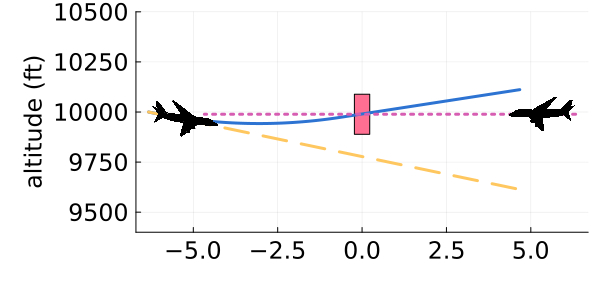

In [31]:
des1500_plot = plot_trajectory_gathered("des1500-rerun",crash_trace,cf_trace,show_planes=true,xtitle=false)

In [32]:
plot_trajectory("des1500-notrace",crash_trace,cf_trace,show_planes=true,show_traces=false)

-16.55524009714746
2.0
-0.2889434481534091


"/home/samuel/Dokumente/Projects/CPS/NN-Safety-via-dL/repos/NCubeV-Reinstall/experiments/acas/des1500-notrace.png"

### Previous Advisory: CL1500

In [33]:
folder = "./vertcas-pra05"
prefix = "vertcas-full-compressed-pra05"

"vertcas-full-compressed-pra05"

In [34]:
result_summary, metadata = summarize_and_load(folder,prefix)

Loading results from ./vertcas-pra05/vertcas-full-compressed-pra05-*.jld


(SNNT.VerifierInterface.OlnnvResult(SNNT.VerifierInterface.Unsafe, Any[SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(0, 0), SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(0, 0)  …  SNNT.SMTInterface.SmtFilterMeta(9, 0), SNNT.SMTInterface.SmtFilterMeta(9, 0), SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0)], SNNT.VerifierInterface.Star[SNNT.VerifierInterface.Star(Float32[0.0 -0.52781475 0.0 -0.84935945; 0.0 -0.52781475 0.0 -0.84935945; … ; 0.96237946 

In [35]:
println("Status:")
println(result_summary.status)
println("Enumerated Stars:")
println(sum(x->x.original_meta,result_summary.metadata))
println("Filtered Stars:")
println(sum(x->x.filtered_out,result_summary.metadata))

Status:
Unsafe
Enumerated Stars:
134782
Filtered Stars:
1583


In [36]:
print("Certain counter-examples:")
print(length(filter(x->x.certain,result_summary.stars)))

Certain counter-examples:34636

In [37]:
print("Unertain counter-examples:")
print(length(filter(x->!x.certain,result_summary.stars)))

Unertain counter-examples:22

In [38]:
print("Concrete crashes found using heuristic: ")
concrete_crashes = filter(x->acas_simulate(x;do_print=false,vI_override=0.0)|>has_nmac,filter(x->x[6]!="COC",map(x->acas_interpret_cex(x.counter_example;do_print=false),filter(x->x.certain,result_summary.stars))))
#concrete_crashes = filter(x->acas_simulate(x;do_print=false)|>has_nmac,map(x->acas_interpret_cex(x.counter_example;do_print=false)),result_summary.stars)
print(length(concrete_crashes))

Concrete crashes found using heuristic: 9161

In [39]:
closest_nmac = argmin(x->acas_simulate(x;vI_override=0.0)|>minimum_distance,concrete_crashes)
cex_i = closest_nmac
#cex_i = concrete_crashes[closest_nmac_i]
#cex_i = concrete_crashes[12000]
println(cex_i)
crash_trace = acas_simulate(cex_i;vI_override=0.0)
print("Has NMAC: ", has_nmac(crash_trace))

(18.554688f0, 37.5f0, 0.0009999999f0, 14300.952f0, 6.27316f0, "SDES1500")
Has NMAC: true

Counterfactual: Keep CL1500 course

In [40]:
cex_cf = [x for x in cex_i]
cex_cf[6]="CL1500"
print(cex_cf)
cf_trace = acas_simulate(cex_cf;vI_override=0.0)
print("Has NMAC: ", has_nmac(cf_trace))

Any[18.554688f0, 37.5f0, 0.0009999999f0, 14300.952f0, 6.27316f0, "CL1500"]Has NMAC: false

In [41]:
plot_trajectory("cl1500-rerun",crash_trace,cf_trace,ylims=(9750,10500),figsize=(1000,200),imgmodifier=1.8,show_planes=true)

26.560316537904416
2.0
0.46356497395833335


"/home/samuel/Dokumente/Projects/CPS/NN-Safety-via-dL/repos/NCubeV-Reinstall/experiments/acas/cl1500-rerun.png"

18.109306730389374
2.0
0.31606702769886363


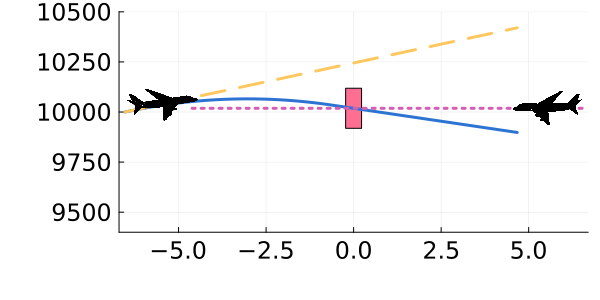

In [42]:
cl1500_plot = plot_trajectory_gathered("cl1500-rerun",crash_trace,cf_trace,show_planes=true,ytitle=false,xtitle=false)

### Previous Advisory: SDES1500

In [43]:
folder = "./vertcas-pra06"
prefix = "vertcas-full-compressed-pra06"

"vertcas-full-compressed-pra06"

In [44]:
result_summary, metadata = summarize_and_load(folder,prefix)

Loading results from ./vertcas-pra06/vertcas-full-compressed-pra06-*.jld


(SNNT.VerifierInterface.OlnnvResult(SNNT.VerifierInterface.Unsafe, Any[SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(1, 0), SNNT.SMTInterface.SmtFilterMeta(0, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0)  …  SNNT.SMTInterface.SmtFilterMeta(16, 0), SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(10, 0), SNNT.SMTInterface.SmtFilterMeta(9, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(14, 0), SNNT.SMTInterface.SmtFilterMeta(9, 0), SNNT.SMTInterface.SmtFilterMeta(11, 0)], SNNT.VerifierInterface.Star[SNNT.VerifierInterface.Star(Float32[0.0 0.42253843 0.0 -0.906345; 0.0 0.42253843 0.0 -0.906345; … ; -0.999999 0.0

In [45]:
println("Status:")
println(result_summary.status)
println("Enumerated Stars:")
println(sum(x->x.original_meta,result_summary.metadata))
println("Filtered Stars:")
println(sum(x->x.filtered_out,result_summary.metadata))

Status:
Unsafe
Enumerated Stars:
169496
Filtered Stars:
88


In [46]:
print("Certain counter-examples:")
print(length(filter(x->x.certain,result_summary.stars)))

Certain counter-examples:5360

In [47]:
print("Uncertain counter-examples:")
print(length(filter(x->!x.certain,result_summary.stars)))

Uncertain counter-examples:0

In [48]:
print("Concrete crashes found using heuristic: ")
concrete_crashes = filter(x->acas_simulate(x;do_print=false,vI_override=0.0)|>has_nmac,filter(x->x[6]!="COC",map(x->acas_interpret_cex(x.counter_example;do_print=false),filter(x->x.certain,result_summary.stars))))
#concrete_crashes = filter(x->acas_simulate(x;do_print=false)|>has_nmac,map(x->acas_interpret_cex(x.counter_example;do_print=false)),result_summary.stars)
print(length(concrete_crashes))

Concrete crashes found using heuristic: 107

In [49]:
closest_nmac = argmin(x->acas_simulate(x;vI_override=0.0)|>minimum_distance,concrete_crashes)
cex_i = closest_nmac
#cex_i = concrete_crashes[closest_nmac_i]
#cex_i = concrete_crashes[12000]
println(cex_i)
crash_trace = acas_simulate(cex_i;vI_override=0.0)
print("Has NMAC: ", has_nmac(crash_trace))

(-157.22656f0, -42.96875f0, 0.0009999999f0, 14082.111f0, 6.173687f0, "SCL1500")
Has NMAC: true

Counterfactual: Keep SDES1500 course

In [50]:
cex_cf = [x for x in cex_i]
cex_cf[6]="SDES1500"
print(cex_cf)
cf_trace = acas_simulate(cex_cf;vI_override=0.0)
print("Has NMAC: ", has_nmac(cf_trace))

Any[-157.22656f0, -42.96875f0, 0.0009999999f0, 14082.111f0, 6.173687f0, "SDES1500"]Has NMAC: false

In [51]:
plot_trajectory("sdes1500-rerun",crash_trace,cf_trace, show_planes=true)

-21.735462207953837
2.0
-0.3793553799715909


"/home/samuel/Dokumente/Projects/CPS/NN-Safety-via-dL/repos/NCubeV-Reinstall/experiments/acas/sdes1500-rerun.png"

-21.735462207953837
2.0
-0.3793553799715909


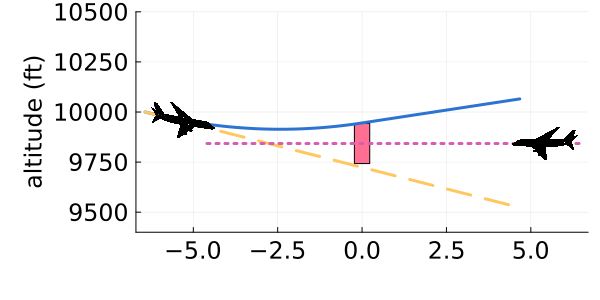

In [52]:
sdes1500_plot = plot_trajectory_gathered("sdes1500-rerun",crash_trace,cf_trace,show_planes=true,ytitle=true,xtitle=false)

### Previous Advisory: SCL1500

In [53]:
folder = "./vertcas-pra07"
prefix = "vertcas-full-compressed-pra07"

"vertcas-full-compressed-pra07"

In [54]:
result_summary, metadata = summarize_and_load(folder,prefix)

Loading results from ./vertcas-pra07/vertcas-full-compressed-pra07-*.jld


(SNNT.VerifierInterface.OlnnvResult(SNNT.VerifierInterface.Unsafe, Any[SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(73, 0), SNNT.SMTInterface.SmtFilterMeta(48, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(0, 0), SNNT.SMTInterface.SmtFilterMeta(0, 0)  …  SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(10, 0), SNNT.SMTInterface.SmtFilterMeta(1, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0)], SNNT.VerifierInterface.Star[SNNT.VerifierInterface.Star(Float32[0.0 -0.42253846 0.0 -0.906345; 0.0 -0.42253846 0.0 -0.906345; … ; -0.69128674 

In [55]:
println("Status:")
println(result_summary.status)
println("Enumerated Stars:")
println(sum(x->x.original_meta,result_summary.metadata))
println("Filtered Stars:")
println(sum(x->x.filtered_out,result_summary.metadata))

Status:
Unsafe
Enumerated Stars:
188674
Filtered Stars:
200


In [56]:
print("Certain counter-examples:")
print(length(filter(x->x.certain,result_summary.stars)))

Certain counter-examples:11319

In [57]:
print("Unertain counter-examples:")
print(length(filter(x->!x.certain,result_summary.stars)))

Unertain counter-examples:4

In [58]:
print("Concrete crashes found using heuristic: ")
concrete_crashes = filter(x->acas_simulate(x;do_print=false,vI_override=0.0)|>has_nmac,filter(x->x[6]!="COC",map(x->acas_interpret_cex(x.counter_example;do_print=false),filter(x->x.certain,result_summary.stars))))
#concrete_crashes = filter(x->acas_simulate(x;do_print=false)|>has_nmac,map(x->acas_interpret_cex(x.counter_example;do_print=false)),result_summary.stars)
print(length(concrete_crashes))

Concrete crashes found using heuristic: 73

In [59]:
closest_nmac = argmin(x->acas_simulate(x;vI_override=0.0)|>minimum_distance,concrete_crashes)
cex_i = closest_nmac
#cex_i = concrete_crashes[closest_nmac_i]
#cex_i = concrete_crashes[12000]
println(cex_i)
crash_trace = acas_simulate(cex_i;vI_override=0.0)
print("Has NMAC: ", has_nmac(crash_trace))

(147.46094f0, 43.164062f0, 0.0009999999f0, 14304.8545f0, 6.274934f0, "SDES2500")
Has NMAC: true

Counterfactual: Keep SCL1500 course

In [60]:
cex_cf = [x for x in cex_i]
cex_cf[6]="SCL1500"
print(cex_cf)
cf_trace = acas_simulate(cex_cf;vI_override=0.0)
print("Has NMAC: ", has_nmac(cf_trace))

Any[147.46094f0, 43.164062f0, 0.0009999999f0, 14304.8545f0, 6.274934f0, "SCL1500"]Has NMAC: false

In [61]:
plot_trajectory("scl1500-rerun",crash_trace,cf_trace,show_planes=true)

21.864967760724
2.0
0.38161567826704546


"/home/samuel/Dokumente/Projects/CPS/NN-Safety-via-dL/repos/NCubeV-Reinstall/experiments/acas/scl1500-rerun.png"

21.864967760724
2.0
0.38161567826704546


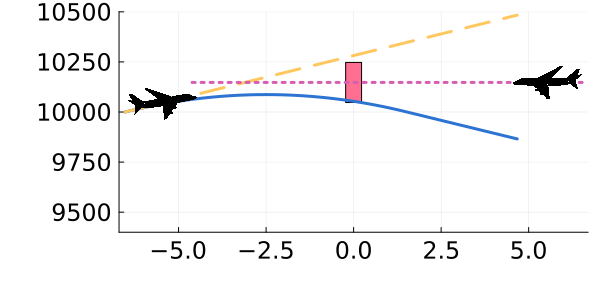

In [62]:
scl1500_plot = plot_trajectory_gathered("scl1500-rerun",crash_trace,cf_trace,show_planes=true,ytitle=false,xtitle=false)

### Previous Advisory: SDES2500

In [75]:
folder = "./vertcas-pra08"
prefix = "vertcas-full-compressed-pra08"

"vertcas-full-compressed-pra08"

In [76]:
result_summary, metadata = summarize_and_load(folder,prefix)

Loading results from ./vertcas-pra08/vertcas-full-compressed-pra08-*.jld


(SNNT.VerifierInterface.OlnnvResult(SNNT.VerifierInterface.Unsafe, Any[SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(10, 0), SNNT.SMTInterface.SmtFilterMeta(10, 0), SNNT.SMTInterface.SmtFilterMeta(14, 0), SNNT.SMTInterface.SmtFilterMeta(21, 0), SNNT.SMTInterface.SmtFilterMeta(9, 0), SNNT.SMTInterface.SmtFilterMeta(47, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0)  …  SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(9, 0), SNNT.SMTInterface.SmtFilterMeta(11, 0), SNNT.SMTInterface.SmtFilterMeta(4, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(1, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0), SNNT.SMTInterface.SmtFilterMeta(19, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(1, 0)], SNNT.VerifierInterface.Star[SNNT.VerifierInterface.Star(Float32[0.0 0.42253843 0.0 -0.906345; 0.0 0.42253843 0.0 -0.906345; … ; 0.93986887

In [77]:
println("Status:")
println(result_summary.status)
println("Enumerated Stars:")
println(sum(x->x.original_meta,result_summary.metadata))
println("Filtered Stars:")
println(sum(x->x.filtered_out,result_summary.metadata))

Status:
Unsafe
Enumerated Stars:
131158
Filtered Stars:
21


In [78]:
print("Certain counter-examples:")
print(length(filter(x->x.certain,result_summary.stars)))

Certain counter-examples:5255

In [79]:
print("Uncertain counter-examples:")
print(length(filter(x->!x.certain,result_summary.stars)))

Uncertain counter-examples:4

In [80]:
print("Concrete crashes found using heuristic: ")
concrete_crashes = filter(x->acas_simulate(x;do_print=false,vI_override=0.0)|>has_nmac,filter(x->x[6]!="COC",map(x->acas_interpret_cex(x.counter_example;do_print=false),filter(x->x.certain,result_summary.stars))))
#concrete_crashes = filter(x->acas_simulate(x;do_print=false)|>has_nmac,map(x->acas_interpret_cex(x.counter_example;do_print=false)),result_summary.stars)
print(length(concrete_crashes))

Concrete crashes found using heuristic: 114

In [81]:
non_sdes2500_crashes = filter(x->x[6]!="SDES2500",concrete_crashes)
closest_nmac = argmin(x->acas_simulate(x;vI_override=0.0)|>minimum_distance,non_sdes2500_crashes)
cex_i = closest_nmac
#cex_i = concrete_crashes[closest_nmac_i]
#cex_i = concrete_crashes[12000]
println(cex_i)
crash_trace = acas_simulate(cex_i;vI_override=0.0)
print("Has NMAC: ", has_nmac(crash_trace))

(158.44727f0, 42.1875f0, 0.0009999999f0, 13866.357f0, 6.075617f0, "SCL2500")
Has NMAC: true

Counterfactual: Keep SDES2500 course

In [82]:
cex_cf = [x for x in cex_i]
cex_cf[6]="SDES2500"
print(cex_cf)
cf_trace = acas_simulate(cex_cf;vI_override=0.0)
print("Has NMAC: ", has_nmac(cf_trace))

Any[158.44727f0, 42.1875f0, 0.0009999999f0, 13866.357f0, 6.075617f0, "SDES2500"]Has NMAC: false

In [83]:
plot_trajectory("sdes2500-rerun",crash_trace,cf_trace,show_planes=true)

27.973199398354442
2.0
0.48822443181818187


"/home/samuel/Dokumente/Projects/CPS/NN-Safety-via-dL/repos/NCubeV-Reinstall/experiments/acas/sdes2500-rerun.png"

27.973199398354442
2.0
0.48822443181818187


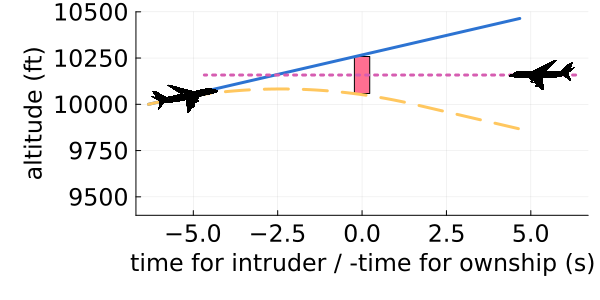

In [84]:
sdes2500_plot = plot_trajectory_gathered("sdes2500-rerun",crash_trace,cf_trace,show_planes=true,ytitle=true,xtitle=true)

### Previous Advisory: SCL2500

In [85]:
folder = "./vertcas-pra09"
prefix = "vertcas-full-compressed-pra09"

"vertcas-full-compressed-pra09"

In [86]:
result_summary, metadata = summarize_and_load(folder,prefix)

Loading results from ./vertcas-pra09/vertcas-full-compressed-pra09-*.jld


(SNNT.VerifierInterface.OlnnvResult(SNNT.VerifierInterface.Unsafe, Any[SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0), SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(9, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(2, 0)  …  SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(10, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(8, 0), SNNT.SMTInterface.SmtFilterMeta(7, 0), SNNT.SMTInterface.SmtFilterMeta(3, 0), SNNT.SMTInterface.SmtFilterMeta(5, 0), SNNT.SMTInterface.SmtFilterMeta(6, 0)], SNNT.VerifierInterface.Star[SNNT.VerifierInterface.Star(Float32[0.0 -0.42253846 0.0 -0.906345; 0.0 -0.42253846 0.0 -0.906345; … ; -0.9984595 -0.

In [87]:
println("Status:")
println(result_summary.status)
println("Enumerated Stars:")
println(sum(x->x.original_meta,result_summary.metadata))
println("Filtered Stars:")
println(sum(x->x.filtered_out,result_summary.metadata))

Status:
Unsafe
Enumerated Stars:
169113
Filtered Stars:
101


In [88]:
print("Certain counter-examples:")
print(length(filter(x->x.certain,result_summary.stars)))

Certain counter-examples:7842

In [89]:
print("Uncertain counter-examples:")
print(length(filter(x->!x.certain,result_summary.stars)))

Uncertain counter-examples:4

In [90]:
print("Concrete crashes found using heuristic: ")
concrete_crashes = filter(x->acas_simulate(x;do_print=false,vI_override=0.0)|>has_nmac,filter(x->x[6]!="COC",map(x->acas_interpret_cex(x.counter_example;do_print=false),filter(x->x.certain,result_summary.stars))))
#concrete_crashes = filter(x->acas_simulate(x;do_print=false)|>has_nmac,map(x->acas_interpret_cex(x.counter_example;do_print=false)),result_summary.stars)
print(length(concrete_crashes))

Concrete crashes found using heuristic: 221

In [91]:
closest_nmac = argmin(x->acas_simulate(x;vI_override=0.0)|>minimum_distance,concrete_crashes)
cex_i = closest_nmac
#cex_i = concrete_crashes[closest_nmac_i]
#cex_i = concrete_crashes[12000]
println(cex_i)
crash_trace = acas_simulate(cex_i;vI_override=0.0)
print("Has NMAC: ", has_nmac(crash_trace))

(362.3047f0, 77.34375f0, 0.0009999999f0, 13854.302f0, 6.070137f0, "SDES1500")
Has NMAC: true

Counterfactual: Keep SCL2500 course

In [92]:
cex_cf = [x for x in cex_i]
cex_cf[6]="SCL2500"
print(cex_cf)
cf_trace = acas_simulate(cex_cf;vI_override=0.0)
print("Has NMAC: ", has_nmac(cf_trace))

Any[362.3047f0, 77.34375f0, 0.0009999999f0, 13854.302f0, 6.070137f0, "SCL2500"]Has NMAC: false

In [93]:
plot_trajectory("scl2500-rerun",crash_trace,cf_trace,show_planes=true)

44.52843949550191
2.0
0.777167879971591


"/home/samuel/Dokumente/Projects/CPS/NN-Safety-via-dL/repos/NCubeV-Reinstall/experiments/acas/scl2500-rerun.png"

44.52843949550191
2.0
0.777167879971591


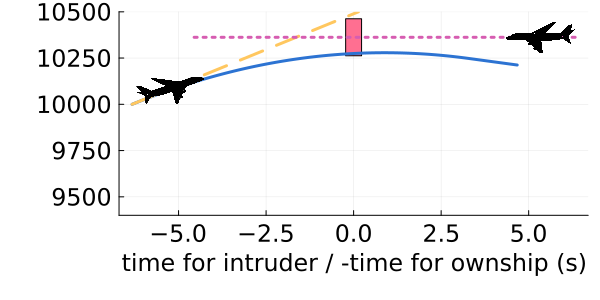

In [99]:
scl2500_plot = plot_trajectory_gathered("scl2500-rerun",crash_trace,cf_trace,show_planes=true,ytitle=false,xtitle=true)

# Common Plot

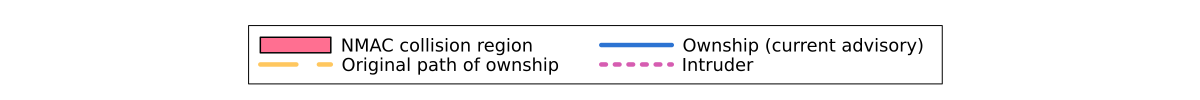

In [154]:
des1500_plot_copy = deepcopy(des1500_plot)
des1500_plot_copy = plot!(des1500_plot_copy,legend=(0.2,0),framestyle=:none,legend_column = 2,size=(1200,100),magin=100,xlims=(-100,-99),legend_font_pointsize=12)

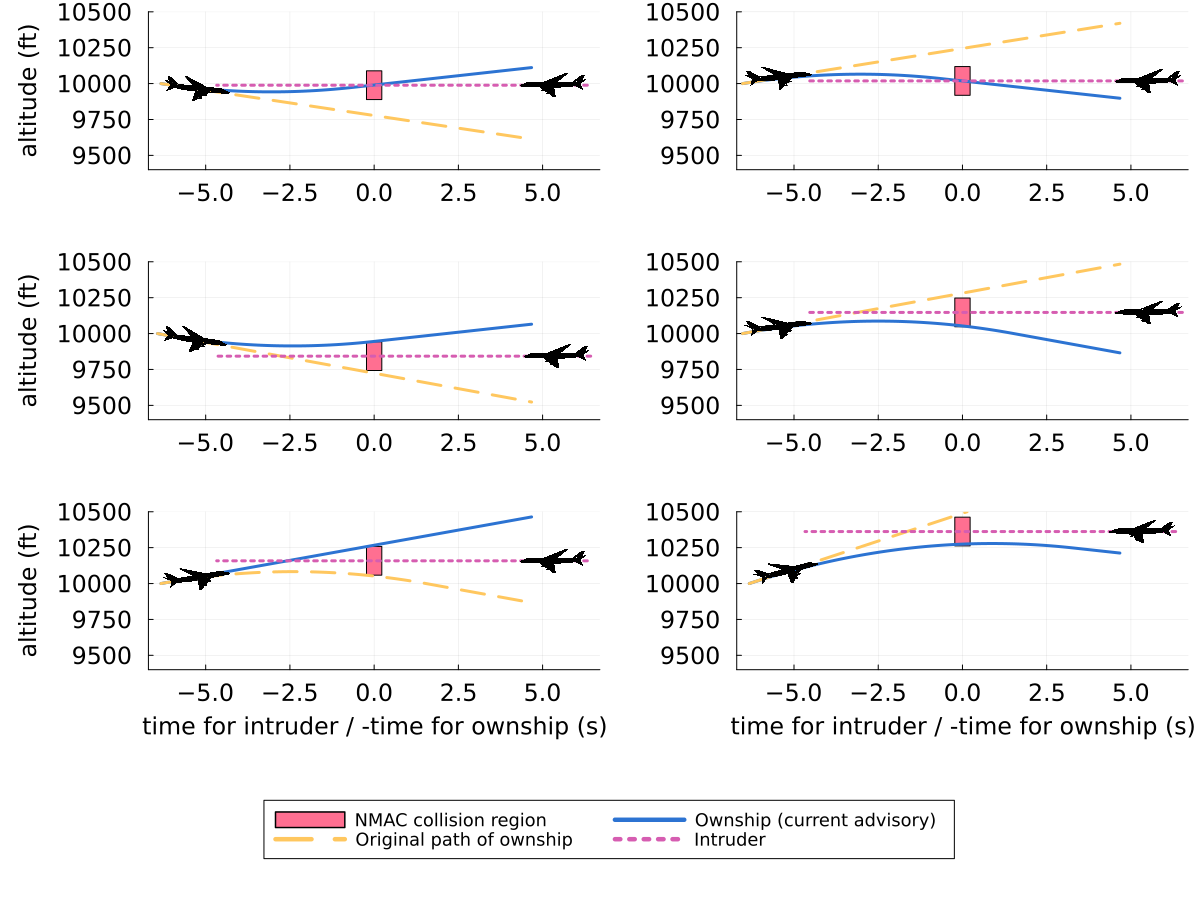

In [158]:
plot(des1500_plot, cl1500_plot, sdes1500_plot, scl1500_plot, sdes2500_plot, scl2500_plot, des1500_plot_copy, layout = l,size=(1200,900))

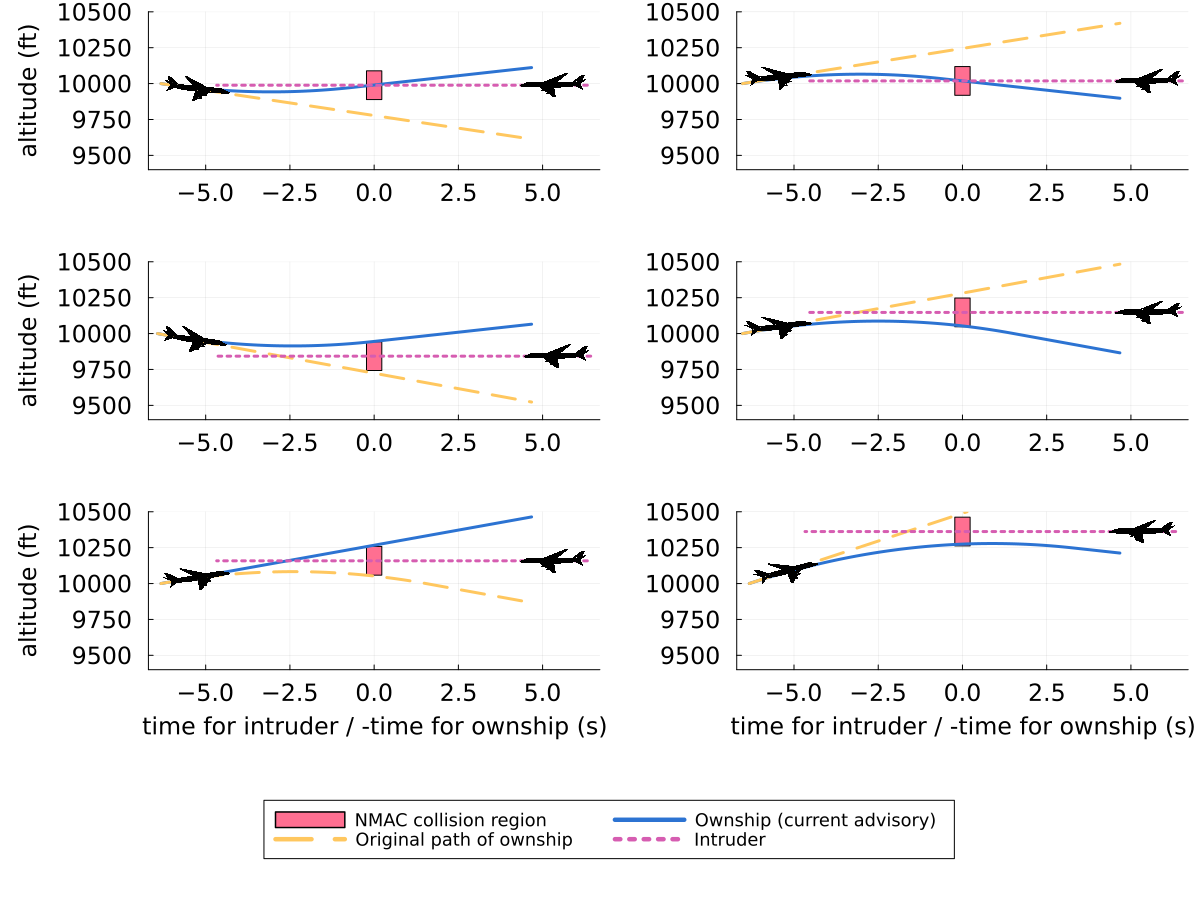

In [159]:
common_plot = plot!()

In [161]:
savefig(common_plot,"acas_common_plot.pdf")

"/home/samuel/Dokumente/Projects/CPS/NN-Safety-via-dL/repos/NCubeV-Reinstall/experiments/acas/acas_common_plot.pdf"